In [1]:
from ridge_map import RidgeMap, FontManager
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import numpy as np

In [2]:
font = FontManager('https://github.com/google/fonts/blob/master/ofl/montserrat/Montserrat-Regular.ttf?raw=True')

In [9]:
rm = RidgeMap((0.115356,42.760121,0.417480,42.937826), font=font.prop)

In [4]:
rm = RidgeMap((0.417480,42.937826, 0.115356,42.760121), font=font.prop)

In [10]:
viridisBig = cm.get_cmap('viridis', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.10, 1, 512)))

In [11]:
sl = (0.329139, 42.818331)

In [12]:
sl_coords = ((sl[0] - rm.longs[0])/(rm.longs[1] - rm.longs[0]),(sl[1] - rm.lats[0])/(rm.lats[1] - rm.lats[0]))

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


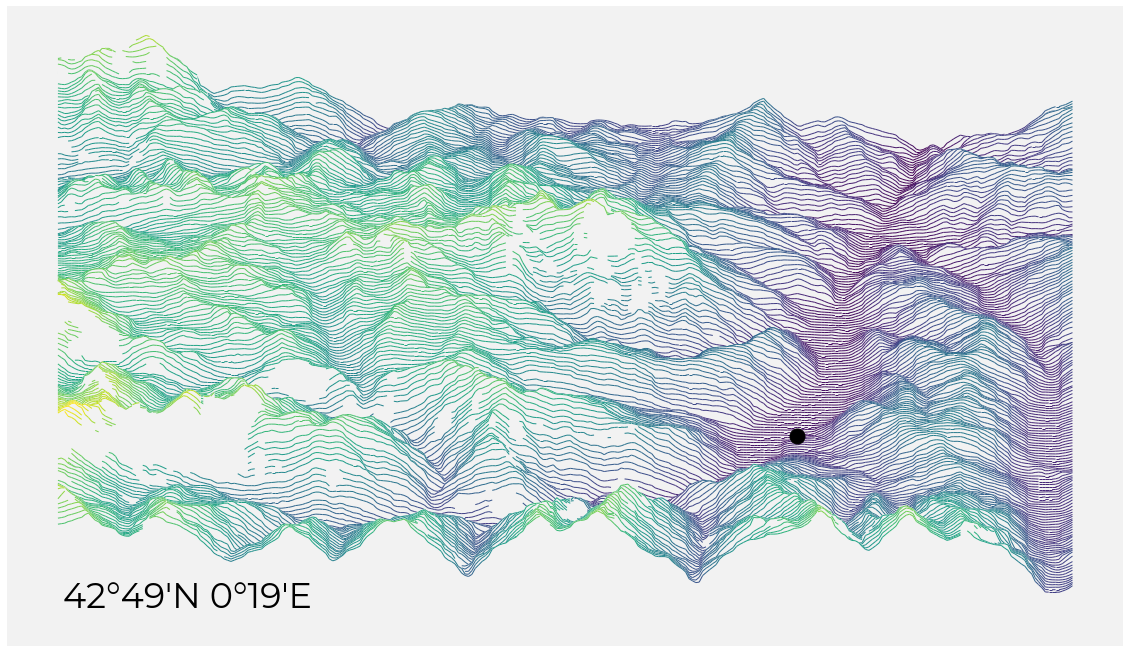

In [16]:
values = rm.get_elevation_data(num_lines=180)
values=rm.preprocess(
    values=values,
    lake_flatness=0,
    water_ntile=0,
    vertical_ratio=300)

ridges = rm.plot_map(values=values,
            label="42°49'N 0°19'E",
            label_y=0.05,
            label_x=0.05,
            label_size=35,
            linewidth=1,
            background_color='.95',
            #line_color = newcmp, 
            line_color = plt.get_cmap('viridis'),
            kind='elevation')

ridges.plot(*sl_coords, 'o',
            color='k',
            transform=ridges.transAxes,
            ms=15,
            zorder=len(values)+10)

plt.savefig('./ridges.png', dpi=100)

In [91]:
ridges.text(sl_coords[0]+0.005, sl_coords[1]+0.005, 'Home',
            fontproperties=rm.font,
            size=20,
            color="k",
            transform=ridges.transAxes,
            verticalalignment="bottom",
            zorder=len(values)+10)

Text(0.7126001906501966, 0.33256534706396285, 'Home')